# Evolved Scatter around Main Sequence

We seek to understand where in our color-magnitude diagrams do the evolved stars begin to separate from the main sequence. We present a series of histograms to demonstrate the scatter of evolved stars around the main sequence plume in our (NUV-V)o vs. (NUV)o color-magnitude diagram.

## Import

In [1]:
# Standard
import numpy as np
import matplotlib.pyplot as plt

# Auxillary
import smc
from scipy import stats
from scipy.stats import gaussian_kde

%config InlineBackend.figure_format = "retina"

## Foreground-corrected photometry

In [2]:
# Original files
data = np.genfromtxt('../data/foreground_corrected_photometry', dtype=None, names=True)

id_number, ra, dec, nuv_v, nuv, b_v, v = data['id'], data['ra'], data['dec'], \
data['nuv_v'], data['nuv'], data['b_v'], data['v']

print("There are {} field stars in our photometric sample".format(len(nuv)))

There are 1073 field stars in our photometric sample


## Define function for visualizing evolved stellar scatter

In [47]:
def evolved_stellar_scatter(x, y, color, title, label, y1, y2):
    # Main sequence stars
    main_seq_bounds = (y >= 4.75 * x - 1.4) & (y <= 4.75 * x + 3.4) & (y >= -2.5)
    mainx = x[main_seq_bounds]
    mainy = y[main_seq_bounds]
            
    ridge_centroidsx, ridge_centroidsy = smc.find_ridge_line(mainx, mainy, 8)
    fit, intercept, slope = smc.ridge_fit(x, y, mainx, mainy, ridge_centroidsx, ridge_centroidsy)
    
    plt.plot(mainx, fit, color='mediumblue', linewidth=3, alpha = 0.8, zorder=3, label='Main sequence fit')
    plt.scatter(x, y, color='k', s=10, marker="o", alpha=0.6, zorder=1, label='All photometered stars')
    
    # Evolved + bright stars
    evolved_bounds = (y < y1) & (y > y2)
    evolvedx = x[evolved_bounds]
    evolvedy = y[evolved_bounds]
    
    plt.scatter(evolvedx, evolvedy, color=color, s=10, marker="o", alpha=1.0, \
                zorder=2, label=label)
    smc.plt_nuv(title, True)
    
    fitx = (evolvedy - intercept) / slope
    evolved_scatter = evolvedx - fitx
    return evolved_scatter

## One-dimensional histograms

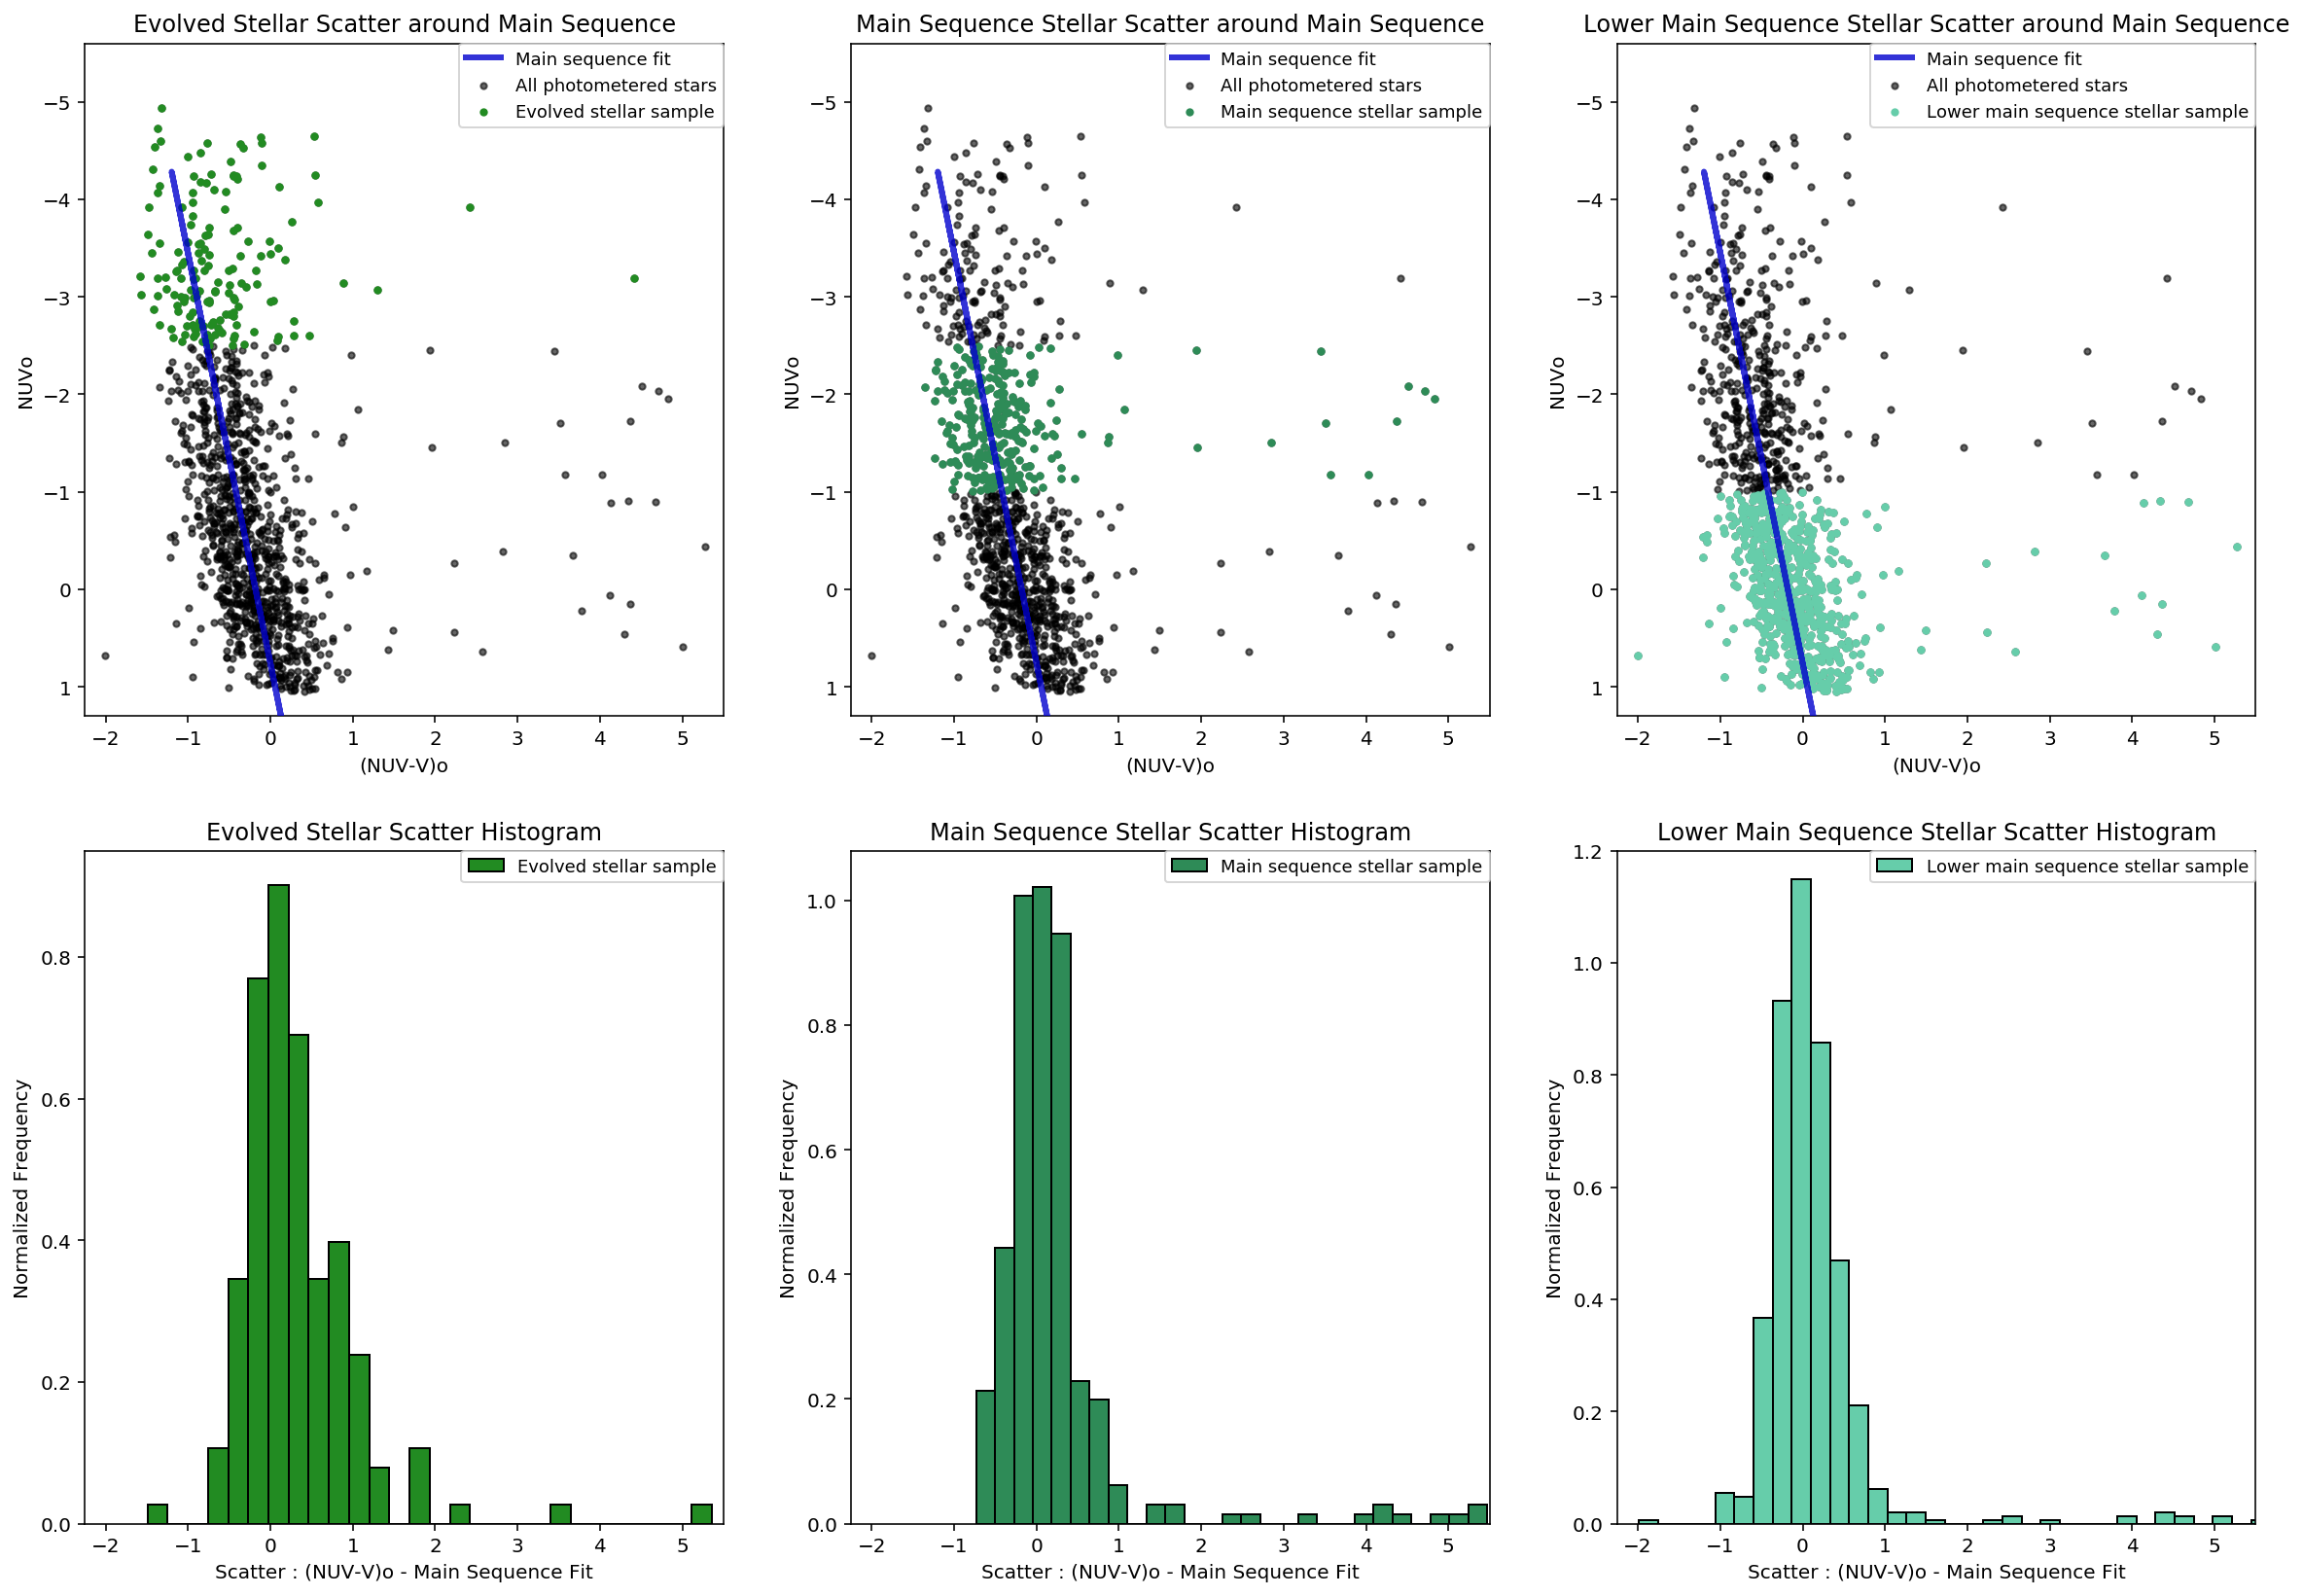

In [60]:
colors = ['forestgreen', 'seagreen', 'mediumaquamarine']

plt.figure(figsize=(20, 14))
a,b = 2,3
limit1 = -2.5
limit2 = -1.0

# Color-magnitude diagrams
plt.subplot(a,b,1)
evolved_scatter = evolved_stellar_scatter(nuv_v, nuv, colors[0], \
                                          'Evolved Stellar Scatter around Main Sequence', \
                                          'Evolved stellar sample', limit1, -5.5)
plt.subplot(a,b,2)
main_scatter = evolved_stellar_scatter(nuv_v, nuv, colors[1], \
                                          'Main Sequence Stellar Scatter around Main Sequence', \
                                          'Main sequence stellar sample', limit2, limit1)
plt.subplot(a,b,3)
lower_scatter = evolved_stellar_scatter(nuv_v, nuv, colors[2], \
                                          'Lower Main Sequence Stellar Scatter around Main Sequence', \
                                          'Lower main sequence stellar sample', 1.3, limit2)

# Histograms
plt.subplot(a,b,4)
num_bins = int(len(evolved_scatter) / 5.5)
n, bins, patches = plt.hist(evolved_scatter, num_bins, normed=True, \
                            color = colors[0], edgecolor = 'k', label = "Evolved stellar sample")
smc.plt_parameters('Evolved Stellar Scatter Histogram', \
                   'Scatter : (NUV-V)o - Main Sequence Fit', 'Normalized Frequency', \
                   0, 0.95, -2.25, 5.5, True)

plt.subplot(a,b,5)
num_bins = int(len(main_scatter) / 10.5)
n, bins, patches = plt.hist(main_scatter, num_bins, normed=True, \
                            color = colors[1], edgecolor = 'k', label = "Main sequence stellar sample")
smc.plt_parameters('Main Sequence Stellar Scatter Histogram', \
                   'Scatter : (NUV-V)o - Main Sequence Fit', 'Normalized Frequency', \
                   0, 1.08, -2.25, 5.5, True)

plt.subplot(a,b,6)
num_bins = int(len(lower_scatter) / 17.5)
n, bins, patches = plt.hist(lower_scatter, num_bins, normed=True, \
                            color = colors[2], edgecolor = 'k', label = "Lower main sequence stellar sample")
smc.plt_parameters('Lower Main Sequence Stellar Scatter Histogram', \
                   'Scatter : (NUV-V)o - Main Sequence Fit', 'Normalized Frequency', \
                   0, 1.2, -2.25, 5.5, True)



plt.savefig("images/Evolved_Scatter_around_Main_Sequence.jpg")
plt.show()

## Two-dimensional histogram

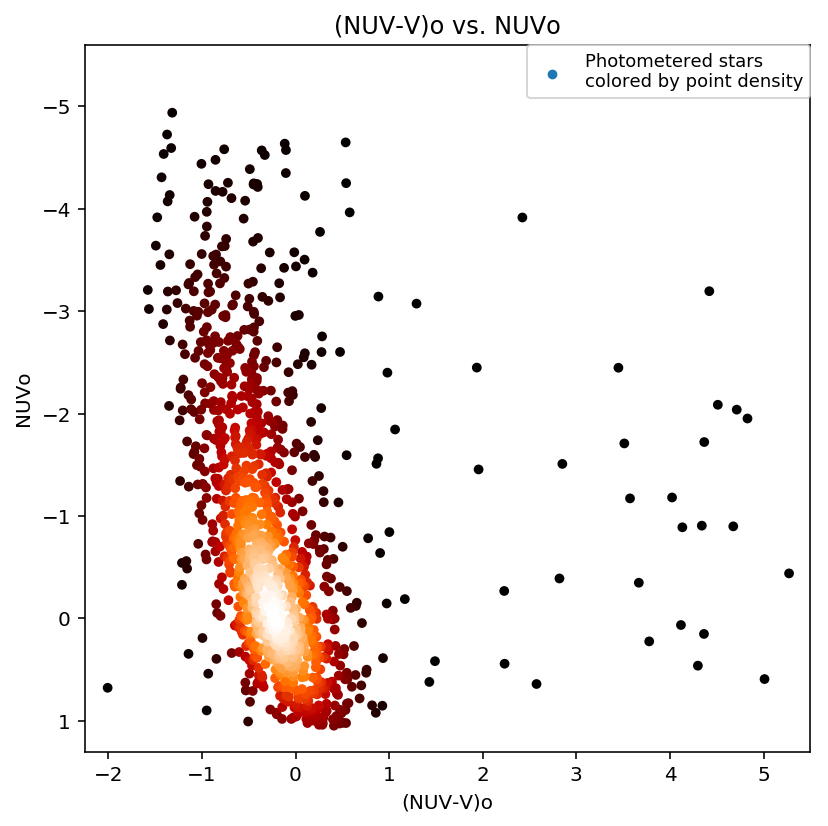

In [63]:
plt.figure(figsize=(6.5, 6.5))

# Data
x = nuv_v
y = nuv

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# Define colors
cm = plt.cm.get_cmap('gist_heat')

plt.scatter(x, y, c = z, s = 15, cmap = cm, label='Photometered stars\ncolored by point density')
smc.plt_nuv('(NUV-V)o vs. NUVo', True)

plt.show()

## Analysis
Comparison to Castro paper.